Question 3. Solve the Rössler system.  Set b=0.1 and c=14. Scanning the parameter a between 0 and 0.2, construct a bifurcation diagram in a similar way as the logistic map. Pick the values of 𝑎 corresponding to period 1, 2, 4 and chaotic states and get the FFTs of them.  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
# set the parameters
b = 0.1
c = 14
a = np.arange(0,0.2,0.001)
tmax=100
dt=0.01
N=int(tmax/dt)
t=np.arange(0,N)
t = dt*t

In [3]:
df=1/(dt*N)
f=np.arange(-N/2,N/2)
f *= df

In [4]:
# Euler method
def F(y,p1,p2,p3):
    dx = -y[1]-y[2]
    dy = y[0]+p1*y[1]
    dz = p2+y[2]*y[0]-p3*y[2]
    # parameters: p1,p2,p3
    return dx, dy, dz

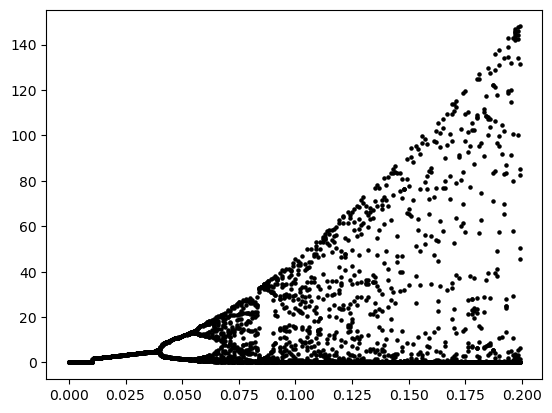

In [5]:
xl=np.zeros(len(t))
yl=np.zeros(len(t))
zl=np.zeros(len(t))
for al in a:
    p=[al]
    #Using euler's method
    for i in range(len(t)-1):
        dx, dy, dz = F([xl[i],yl[i],zl[i]],al,b,c)
        xl[i+1]=xl[i]+dx*dt
        yl[i+1]=yl[i]+dy*dt
        zl[i+1]=zl[i]+dz*dt
        p.append(al)
    pks, _ = find_peaks(zl)
    local_max = zl[pks]
    p = np.array(p)
    plt.scatter(p[pks],local_max,s=5,color='black')

    xl[0], yl[0], zl[0] = xl[-1], yl[-1], zl[-1]

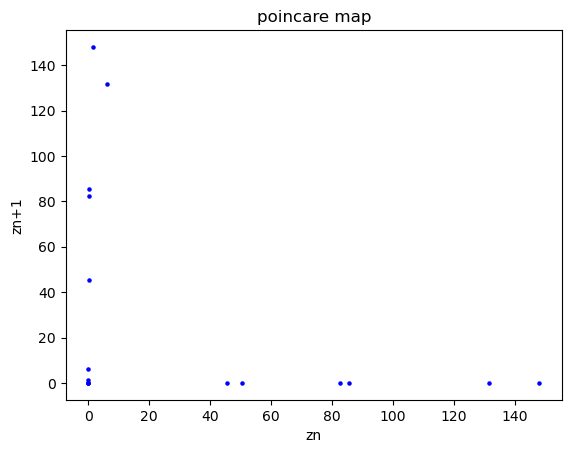

In [6]:
pks, _ = find_peaks(zl)
local_max = zl[pks]
plt.title("poincare map")
plt.xlabel("zn")
plt.ylabel("zn+1")
plt.scatter(local_max[:-1],local_max[1:],s=5,c='blue')
plt.show()